# QUIMB Visuals

This notebook creates visuals used in the presentation.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

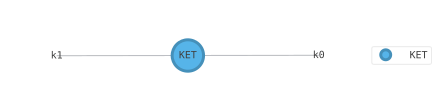

In [2]:
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
ket.draw('KET')

In [3]:
type(ket)

quimb.tensor.tensor_core.Tensor

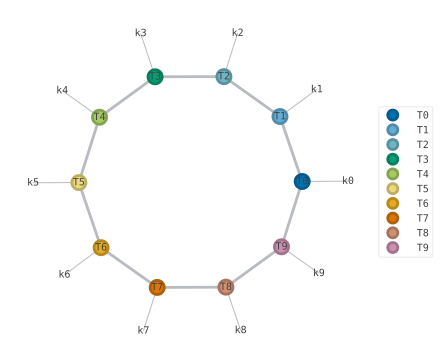

In [4]:
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor(tags=f'T{i}') for i in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)
    
    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)
    
mps = qtn.TensorNetwork(tensors)
mps.draw([f'T{i}' for i in range(L)])

In [5]:
type(mps)

quimb.tensor.tensor_core.TensorNetwork

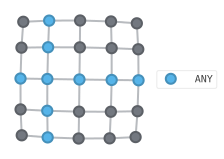

In [6]:
tn = qtn.TN2D_rand(5, 5, D=4)
tn.select(tags=['X2', 'Y3'], which='any').add_tag('ANY')
tn.draw('ANY', figsize=(3, 3))

In [7]:
type(tn)

quimb.tensor.tensor_2d.TensorNetwork2D

In [8]:
from tebd.matrix_product_states import MatrixProductState

In [9]:
N = 5
bond_dim = 30

In [10]:
mps = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [11]:
fix = {
    'state 1': (0, 0),
    'SV 1': (1, 0),
    'state 2': (2, 0),
    'SV 2': (3, 0),
    'state 3': (4, 0),
    'SV 3': (5, 0),
    'state 4': (6, 0),
    'SV 4': (7, 0),
    'state 5': (8, 0),
    'SV 5': (9, 0),
    'k0': (0, -1),
    'k1': (2, -1),
    'k2': (4, -1),
    'k3': (6, -1),
    'k4': (8, -1)
    
}

In [12]:
tags = [
    'state 1', 'state 2', 'state 3', 'state 4', 'state 5'
]

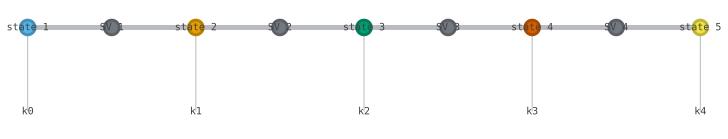

In [13]:
qtn.TensorNetwork(mps.data).draw(tags, figsize=(10, 3), fix=fix, legend=False)

In [14]:
N = 10

In [15]:
mps = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [16]:
tags = [
    'state 1', 'state 2', 'state 3', 'state 4', 'state 5',
    'state 6', 'state 7', 'state 8', 'state 9', 'state 10'
]

In [17]:
fix_full = {
    'state 1': (0, 0),
    'SV 1': (1, 0),
    'state 2': (2, 0),
    'SV 2': (3, 0),
    'state 3': (4, 0),
    'SV 3': (5, 0),
    'state 4': (6, 0),
    'SV 4': (7, 0),
    'state 5': (8, 0),
    'SV 5': (9, 0),
    'state 6': (10, 0),
    'SV 6': (11, 0),
    'state 7': (12, 0),
    'SV 7': (13, 0),
    'state 8': (14, 0),
    'SV 8': (15, 0),
    'state 9': (16, 0),
    'SV 9': (17, 0),
    'state 10': (18, 0),
    'k0': (0, -1),
    'k1': (2, -1),
    'k2': (4, -1),
    'k3': (6, -1),
    'k4': (8, -1),
    'k5': (10, -1),
    'k6': (12, -1),
    'k7': (14, -1),
    'k8': (16, -1),
    'k9': (18, -1)
}

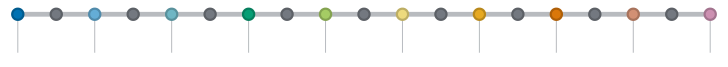

In [18]:
qtn.TensorNetwork(mps.data).draw(
    tags, figsize=(10, 3), show_tags=False, show_inds=False, fix=fix_full, legend=False
)

In [19]:
import numpy as np

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.tebd import TEBD

In [20]:
loc_ham = LocalIsingHamiltonian(N=N)
glob_ham = IsingHamiltonian(N=N)

In [21]:
tebd_obj = TEBD(mps, loc_ham, glob_ham, bond_dim=bond_dim, evol_type="imag")

In [22]:
tau = 0.01
gate_idx = 1

In [23]:
two_site_gate = tebd_obj._gen_gate(tebd_obj.local_H.hamiltonians[gate_idx], tau)

In [24]:
left_site = mps.get_state(gate_idx)
right_site = mps.get_state(gate_idx + 1)
left_bond = mps.get_sv(gate_idx - 1)
central_bond = mps.get_sv(gate_idx)
right_bond = mps.get_sv(gate_idx + 1)

In [25]:
left_bond_T = qtn.Tensor(left_bond.data, inds=('f0', 'k1'), tags=['left bond'])
left_site_T = qtn.Tensor(left_site.data, inds=('k1', 'k2', 'k3'), tags=['left site'])
central_bond_T = qtn.Tensor(central_bond.data, inds=('k3', 'k4'), tags=['central bond'])
right_site_T = qtn.Tensor(right_site.data, inds=('k4', 'k5', 'k6'), tags=['right site'])
right_bond_T = qtn.Tensor(right_bond.data, inds=('k6', 'f3'), tags=['right bond'])
gate_T = qtn.Tensor(two_site_gate, inds=('f1', 'f2', 'k2', 'k5'), tags=['gate'])

In [26]:
TN = left_bond_T & gate_T & left_site_T & central_bond_T & right_site_T & right_bond_T

In [27]:
fix_state = {
    'left bond': (0, 0),
    'left site': (1, 0),
    'central bond': (2, 0),
    'right site': (3, 0),
    'right bond': (4, 0),
    'gate': (2, -0.5),
    'f3': (-1, 0),
    'f2': (1, -1),
    'f1': (3, -1),
    'f0': (5, 0)
}

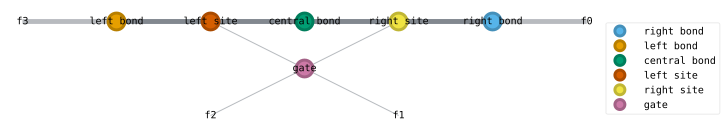

In [28]:
TN.draw(
    ['right bond', 'left bond', 'central bond', 'left site', 'right site', 'gate'], figsize=(10, 10),
    fix=fix_state, label_color='k'
)

In [29]:
fix = {'f3': (-1, 0), 'f0': (1, 0), 'f2': (-1, -1), 'f1': (1, -1)}

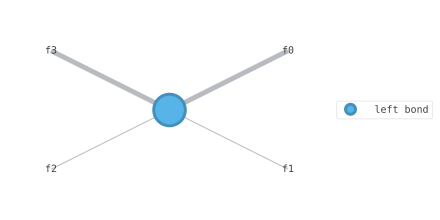

In [30]:
(TN ^ ...).draw(['left bond'], fix=fix, show_tags=False)

In [31]:
left_bond_T = qtn.Tensor(left_bond.data, inds=('f3', 'k1'), tags=['left bond'])
left_site_T = qtn.Tensor(left_site.data, inds=('k1', 'f2', 'k3'), tags=['left site'])
central_bond_T = qtn.Tensor(central_bond.data, inds=('k3', 'k4'), tags=['central bond'])
right_site_T = qtn.Tensor(right_site.data, inds=('k4', 'f1', 'k6'), tags=['right site'])
right_bond_T = qtn.Tensor(right_bond.data, inds=('k6', 'f0'), tags=['right bond'])

In [32]:
TN = left_bond_T & left_site_T & central_bond_T & right_site_T & right_bond_T

In [33]:
fix_state = {
    'left bond': (0, 0),
    'left site': (1, 0),
    'central bond': (2, 0),
    'right site': (3, 0),
    'right bond': (4, 0),
    'f2': (1, -1),
    'f1': (3, -1),
    'f0': (5, 0),
    'f3': (-1, 0)
}

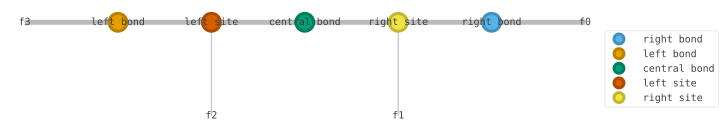

In [34]:
TN.draw(['right bond', 'left bond', 'central bond', 'left site', 'right site'], figsize=(10, 10), fix=fix_state)

In [35]:
tebd_obj.step(tau)

In [36]:
all_inds = ()
for tag in ['SV 1', 'SV 2', 'SV 3', 'SV 4', 'SV 9']:
    t = qtn.TensorNetwork(tebd_obj.mps.data)[tag]
    all_inds += t.inds

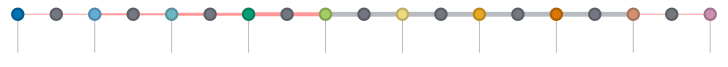

In [37]:
qtn.TensorNetwork(mps.data).draw(
    tags, figsize=(10, 3), show_tags=False, show_inds=False, fix=fix_full, legend=False, highlight_inds=all_inds
)

In [38]:
tebd_obj.step(tau)

In [39]:
all_inds = ()
for tag in ['SV 8']:
    t = qtn.TensorNetwork(tebd_obj.mps.data)[tag]
    all_inds += t.inds

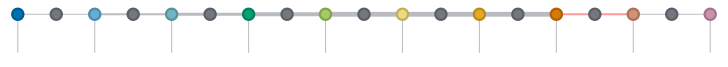

In [40]:
qtn.TensorNetwork(mps.data).draw(
    tags, figsize=(10, 3), show_tags=False, show_inds=False, fix=fix_full, legend=False, highlight_inds=all_inds
)

In [41]:
tebd_obj.step(tau)

In [42]:
all_inds = ()
for tag in ['SV 7']:
    t = qtn.TensorNetwork(tebd_obj.mps.data)[tag]
    all_inds += t.inds

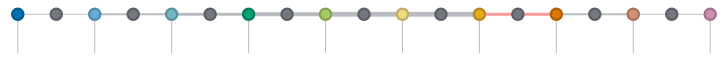

In [43]:
qtn.TensorNetwork(mps.data).draw(
    tags, figsize=(10, 3), show_tags=False, show_inds=False, fix=fix_full, legend=False, highlight_inds=all_inds
)

In [44]:
tebd_obj.step(tau)

In [45]:
all_inds = ()
for tag in ['SV 6']:
    t = qtn.TensorNetwork(tebd_obj.mps.data)[tag]
    all_inds += t.inds

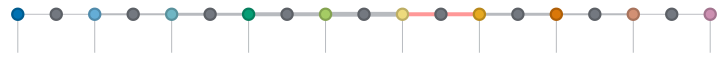

In [46]:
qtn.TensorNetwork(mps.data).draw(
    tags, figsize=(10, 3), show_tags=False, show_inds=False, fix=fix_full, legend=False, highlight_inds=all_inds
)

In [47]:
N = 4

mps = MatrixProductState(d=2, N=N, bond_dim=bond_dim)
loc_ham = LocalIsingHamiltonian(N=N)
glob_ham = IsingHamiltonian(N=N)

tebd_obj = TEBD(mps, loc_ham, glob_ham, bond_dim=bond_dim, evol_type="imag")

In [48]:
rho = tebd_obj.mps.rho()
rhoC = rho ^ ...

inds = tuple([f'k{i}' for i in range(2 * tebd_obj.N)])

ham_tensor = qtn.Tensor(tebd_obj.global_H.hamiltonian, inds=inds, tags=['ham'])
rho_tensor = qtn.Tensor(rhoC.data, inds=inds, tags=['rho'])

energy_tensor = ham_tensor & rho_tensor
energy = energy_tensor ^ ...

In [49]:
ham_tensor

Tensor(shape=(2, 2, 2, 2, 2, 2, 2, 2), inds=('k0', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7'), tags=oset(['ham']))

In [50]:
rhoC

Tensor(shape=(2, 2, 2, 2, 2, 2, 2, 2), inds=('k4', 'k5', 'k6', 'k7', 'k0', 'k1', 'k2', 'k3'), tags=oset(['state 1 conj', 'state 2 conj', 'state 3 conj', 'state 4 conj', 'state 5 conj', 'state 6 conj', 'state 7 conj', 'state 1', 'SV 1', 'state 2', 'SV 2', 'state 3', 'SV 3', 'state 4']))

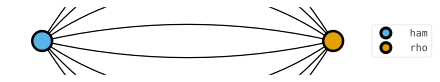

In [51]:
energy_tensor.draw(
    ['ham', 'rho'],
    show_tags=False,
    edge_alpha=1.0,
    edge_color='black',
    node_size=400,
    node_outline_darkness=0.0,
    node_outline_size=2.5
)